In [1]:
import pandas as pd

In [2]:
df_index = pd.read_csv('G:/ESA_downloads/index_qa_temp.csv')

In [3]:
df_index.shape

(28891, 41)

There are in total 28891 csv files.

# Calculate different QA metrics

### Files with only one row or column 

In [4]:
df_index['qa_single_row_or_col'].sum()

533

##### Summary: 
There are 533 out of 28891 csv files with only one row or one column. 

<br>An example would be:<br> 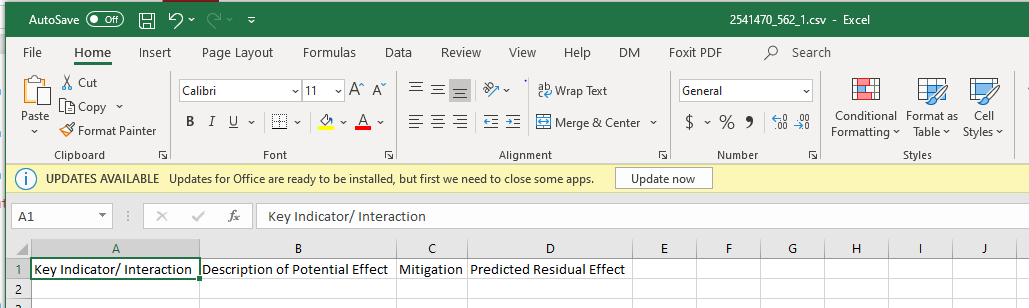

### Files with blank cells (blank cell percentage)

<AxesSubplot:>

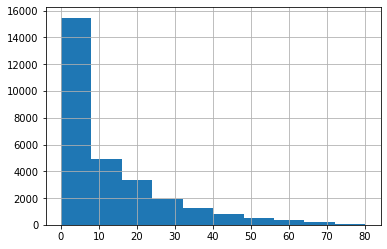

In [5]:
df_index['qa_blank_cell_percent'].hist()

In [6]:
df_index[df_index['qa_blank_cell_percent']>72].shape[0]

88

##### Summary: 
Percentage is calculated by # of blank cells / (row number * column number).

<br>After spot checking some blank csvs, we chose 72% as the threshold to identify potentially corrupted csvs. There are 88 csv files with this problem in total.
<br>
<br>During the process, we identified three completely empty csvs:
<br>        G:/ESA_downloads/copy_Bingjie/tmx/2392795_369_1.csv
<br>        G:/ESA_downloads/copy_Bingjie/tmx/2393470_72_1.csv
<br>        G:/ESA_downloads/copy_Bingjie/nrgst/2968028_16_1.csv
<br>
<br>An example of a sparse csv file is:
<br>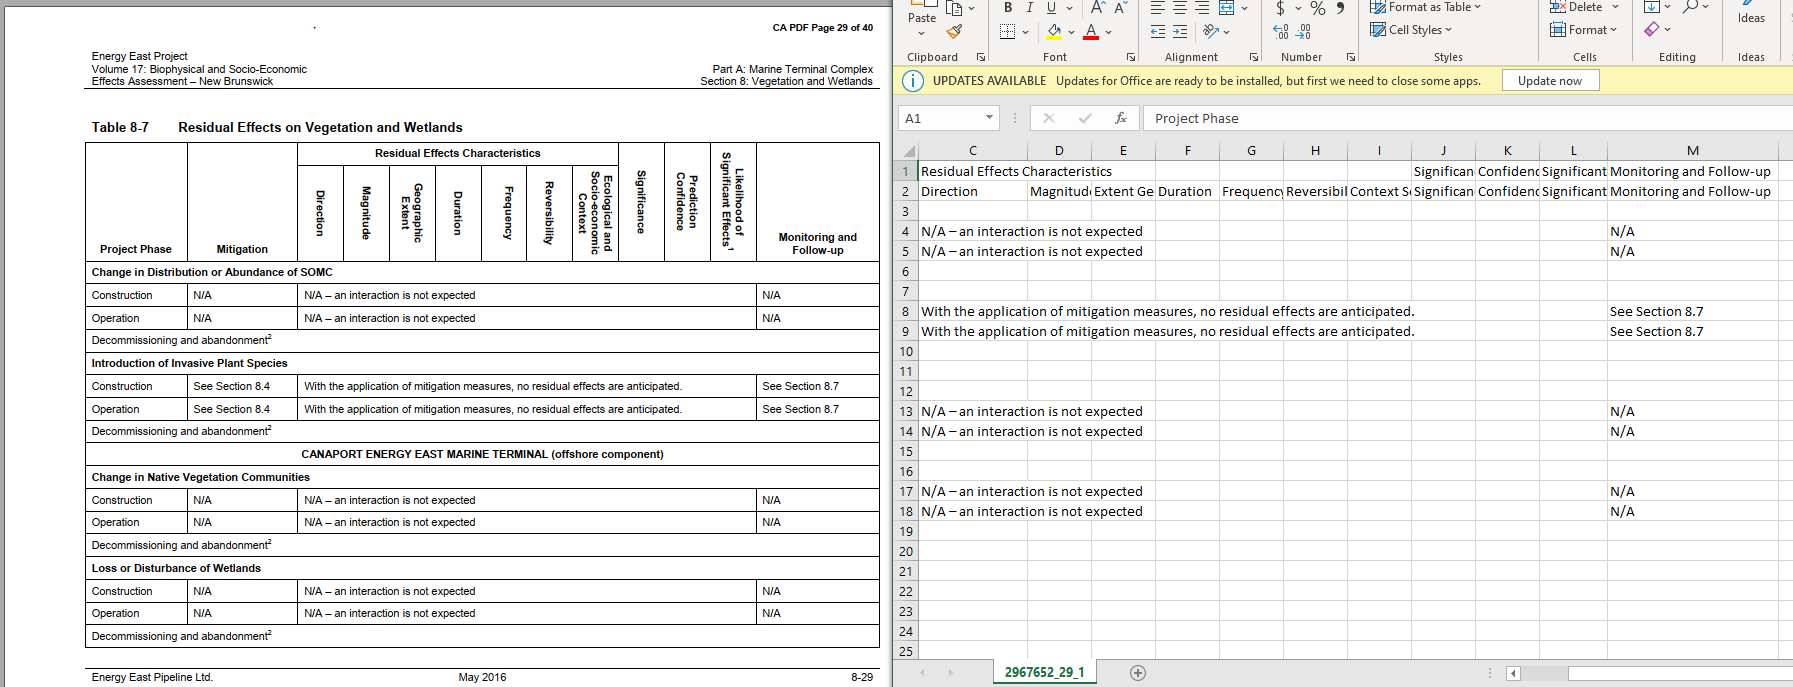

### Files with cid

<AxesSubplot:>

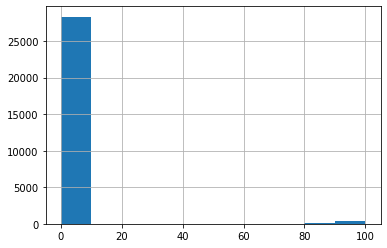

In [7]:
df_index['qa_cid_cell_percent'].hist()

In [8]:
print(df_index[df_index['qa_cid_cell_percent']>0].shape[0])
print(df_index[df_index['qa_cid_cell_percent']>10].shape[0])
print(df_index[df_index['qa_cid_cell_percent']>50].shape[0])
print(df_index[df_index['qa_cid_cell_percent']>80].shape[0])
print(df_index[df_index['qa_cid_cell_percent']>90].shape[0])

642
567
493
429
351


##### Summary
cid happens when the table extraction library is unable to identify the character.
<br>There are in total 642 files with cid in it. Most only have less than 10% cells with cid. There are 429 files with over 80% cid cells.
<br> An example of a csv with mostly cid cells:
<br>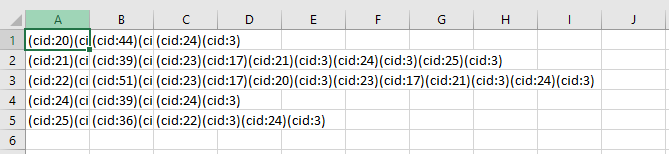

# Metrics Per Project

Use 50% as the threshold for identifying blank csv; use 0% as the threshold for identifying cid csv 

In [9]:
df_index['qa_blank'] = df_index['qa_blank_cell_percent'] > 72
df_index['qa_cid'] = df_index['qa_cid_cell_percent'] > 80

In [10]:
df_index['qa_any'] = df_index[['qa_blank', 'qa_cid', 'qa_duplicate', 'qa_single_row_or_col']].any(axis=1)

In [11]:
df_project = df_index.groupby('Download folder name')[['qa_single_row_or_col', 'qa_blank', 'qa_cid', 'qa_duplicate','qa_any']].sum().reset_index()
df_project_count = df_index.groupby('Download folder name')['CSV Download URL'].count().reset_index().rename(columns={'CSV Download URL': 'total_csv'})

In [12]:
df_project = df_project.merge(df_project_count)
df_project['single_%'] = df_project[['qa_single_row_or_col', 'total_csv']].apply(lambda x: 100*round(x['qa_single_row_or_col']/x['total_csv'], 2), axis=1)
df_project['blank_%'] = df_project[['qa_blank', 'total_csv']].apply(lambda x: 100*round(x['qa_blank']/x['total_csv'], 2), axis=1)
df_project['cid_%'] = df_project[['qa_cid', 'total_csv']].apply(lambda x: 100*round(x['qa_cid']/x['total_csv'], 2), axis=1)
df_project['duplicate_%'] = df_project[['qa_duplicate', 'total_csv']].apply(lambda x: 100*round(x['qa_duplicate']/x['total_csv'], 2), axis=1)
df_project['any_%'] = df_project[['qa_any', 'total_csv']].apply(lambda x: 100*round(x['qa_any']/x['total_csv'], 2), axis=1)


In [13]:
# 'qa_any' is the number of csv files that contain any of the four qa problems (single row/col, sparsity, cid, duplicate)
# 'any_%' is percentage of problematic csvs over total csv count per project
# Sort by 'any_%'
df_project.sort_values('any_%', ascending=False)


,Download folder name,qa_single_row_or_col,qa_blank,qa_cid,qa_duplicate,qa_any,total_csv,single_%,blank_%,cid_%,duplicate_%,any_%
31,strnmnln,153,0,427,329,517,694,22.0,0.0,62.0,47.0,74.0
3,brnswck,90,1,0,275,281,379,24.0,0.0,0.0,73.0,74.0
35,wlvrnrvrltrlllp,122,3,0,240,244,427,29.0,1.0,0.0,56.0,57.0
20,lsmrkttlrvrcrssvr,68,0,0,203,205,415,16.0,0.0,0.0,49.0,49.0
33,twrbrch,33,4,0,112,118,565,6.0,1.0,0.0,20.0,21.0
34,vntg,0,0,0,20,20,531,0.0,0.0,0.0,4.0,4.0
12,kwn,1,0,0,2,3,96,1.0,0.0,0.0,2.0,3.0
11,kmnrth,0,2,2,6,8,305,0.0,1.0,1.0,2.0,3.0
25,nrthrngtwy,37,1,0,2,40,1152,3.0,0.0,0.0,0.0,3.0
4,cshng,0,0,0,2,2,73,0.0,0.0,0.0,3.0,3.0


# Metrics Per PDF

In [14]:
df_pdf = df_index.groupby('PDF Download URL')[['qa_single_row_or_col', 'qa_blank', 'qa_cid', 'qa_duplicate','qa_any']].sum().reset_index()
df_pdf_count = df_index.groupby('PDF Download URL')['CSV Download URL'].count().reset_index().rename(columns={'CSV Download URL': 'total_csv'})

In [15]:
df_pdf = df_pdf.merge(df_pdf_count)
df_pdf['single_%'] = df_pdf[['qa_single_row_or_col', 'total_csv']].apply(lambda x: 100*round(x['qa_single_row_or_col']/x['total_csv'], 2), axis=1)
df_pdf['blank_%'] = df_pdf[['qa_blank', 'total_csv']].apply(lambda x: 100*round(x['qa_blank']/x['total_csv'], 2), axis=1)
df_pdf['cid_%'] = df_pdf[['qa_cid', 'total_csv']].apply(lambda x: 100*round(x['qa_cid']/x['total_csv'], 2), axis=1)
df_pdf['duplicate_%'] = df_pdf[['qa_duplicate', 'total_csv']].apply(lambda x: 100*round(x['qa_duplicate']/x['total_csv'], 2), axis=1)
df_pdf['any_%'] = df_pdf[['qa_any', 'total_csv']].apply(lambda x: 100*round(x['qa_any']/x['total_csv'], 2), axis=1)


In [16]:
df_pdf_meta = df_index[['Data ID', 'PDF Download URL', 'Download folder name']].drop_duplicates()
df_pdf = df_pdf.merge(df_pdf_meta, on='PDF Download URL')


In [17]:
df_pdf.sort_values('any_%', ascending=False)\
[['Data ID','Download folder name','qa_single_row_or_col','qa_blank','qa_cid','qa_duplicate','qa_any','total_csv','single_%','blank_%','cid_%','duplicate_%','any_%']]\
.head(30)

,Data ID,Download folder name,qa_single_row_or_col,qa_blank,qa_cid,qa_duplicate,qa_any,total_csv,single_%,blank_%,cid_%,duplicate_%,any_%
123,2541470,strnmnln,153,0,427,329,517,593,26.0,0.0,72.0,55.0,87.0
569,408937,brnswck,90,1,0,275,281,379,24.0,0.0,0.0,73.0,74.0
110,2445655,wlvrnrvrltrlllp,113,0,0,198,199,276,41.0,0.0,0.0,72.0,72.0
822,702747,lsmrkttlrvrcrssvr,49,0,0,114,115,187,26.0,0.0,0.0,61.0,61.0
763,667050,vntg,0,0,0,4,4,7,0.0,0.0,0.0,57.0,57.0
818,702730,lsmrkttlrvrcrssvr,3,0,0,9,9,16,19.0,0.0,0.0,56.0,56.0
676,549421,kystnxl,0,0,0,10,10,18,0.0,0.0,0.0,56.0,56.0
113,2445982,wlvrnrvrltrlllp,6,0,0,20,20,39,15.0,0.0,0.0,51.0,51.0
817,702727,lsmrkttlrvrcrssvr,15,0,0,74,74,147,10.0,0.0,0.0,50.0,50.0
731,620253,nrthrngtwy,1,0,0,0,1,2,50.0,0.0,0.0,0.0,50.0


Text(0.5, 1.0, 'CSVs with any problem')

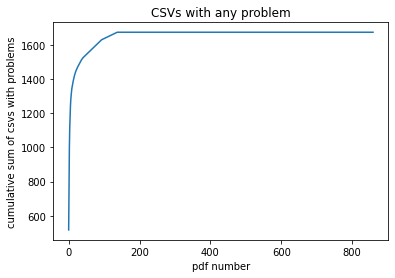

In [18]:
df_pdf = df_pdf.sort_values('qa_any', ascending=False).reset_index(drop=True)
df_pdf['qa_any_acc'] = df_pdf['qa_any'].cumsum()
ax1 = df_pdf['qa_any_acc'].plot()
ax1.set_xlabel('pdf number')
ax1.set_ylabel('cumulative sum of csvs with problems')
ax1.set_title('CSVs with any problem')


Text(0.5, 1.0, 'CSVs with more than 80% cid cells')

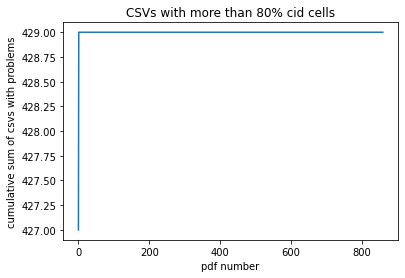

In [19]:
df_pdf = df_pdf.sort_values('qa_cid', ascending=False).reset_index(drop=True)
df_pdf['qa_cid_acc'] = df_pdf['qa_cid'].cumsum()
ax1 = df_pdf['qa_cid_acc'].plot()
ax1.set_xlabel('pdf number')
ax1.set_ylabel('cumulative sum of csvs with problems')
ax1.set_title('CSVs with more than 80% cid cells')

Text(0.5, 1.0, 'duplicate CSVs - same table title, pdf, pdf page')

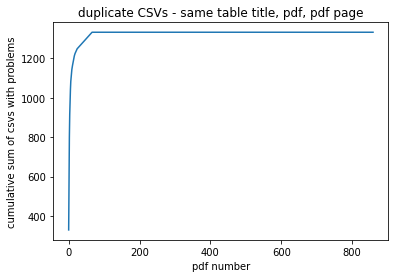

In [20]:
df_pdf = df_pdf.sort_values('qa_duplicate', ascending=False).reset_index(drop=True)
df_pdf['qa_duplicate_acc'] = df_pdf['qa_duplicate'].cumsum()
ax1 = df_pdf['qa_duplicate_acc'].plot()
ax1.set_xlabel('pdf number')
ax1.set_ylabel('cumulative sum of csvs with problems')
ax1.set_title('duplicate CSVs - same table title, pdf, pdf page')

Text(0.5, 1.0, 'CSVs with more than 72% blank cells')

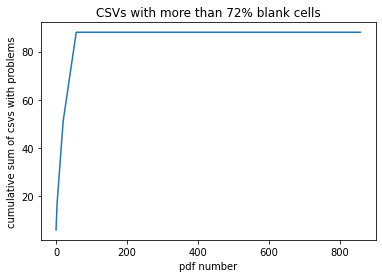

In [21]:
df_pdf = df_pdf.sort_values('qa_blank', ascending=False).reset_index(drop=True)
df_pdf['qa_blank_acc'] = df_pdf['qa_blank'].cumsum()
ax1 = df_pdf['qa_blank_acc'].plot()
ax1.set_xlabel('pdf number')
ax1.set_ylabel('cumulative sum of csvs with problems')
ax1.set_title('CSVs with more than 72% blank cells')

Text(0.5, 1.0, 'CSVs with only one row or column')

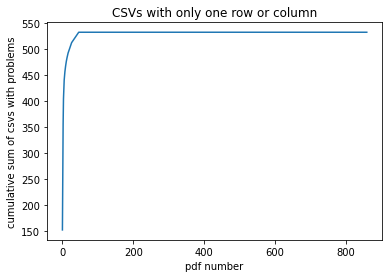

In [22]:
df_pdf = df_pdf.sort_values('qa_single_row_or_col', ascending=False).reset_index(drop=True)
df_pdf['qa_single_acc'] = df_pdf['qa_single_row_or_col'].cumsum()
ax1 = df_pdf['qa_single_acc'].plot()
ax1.set_xlabel('pdf number')
ax1.set_ylabel('cumulative sum of csvs with problems')
ax1.set_title('CSVs with only one row or column')

<AxesSubplot:>

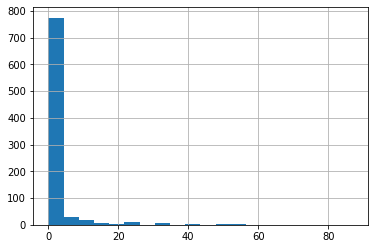

In [23]:
df_pdf['any_%'].hist(bins=20)

In [24]:
print(df_pdf[df_pdf['any_%']>60].shape)
print(df_pdf[df_pdf['any_%']>20].shape)

(4, 19)
(30, 19)


In [25]:
df_pdf['qa_pdf'] = df_pdf['any_%'] > 20

In [26]:
df_project = df_project.merge(df_index.groupby('Download folder name')['Data ID'].nunique().reset_index().rename(columns={'Data ID': 'total_pdf'}))
df_project = df_project.merge(df_pdf.groupby('Download folder name')['qa_pdf'].sum().reset_index())
df_project['qa_pdf_%'] = df_project[['total_pdf', 'qa_pdf']].apply(lambda x: 100*x['qa_pdf']/x['total_pdf'], axis=1)

In [27]:
df_project[['Download folder name', 'total_csv', 'qa_any','any_%','total_pdf','qa_pdf','qa_pdf_%']].sort_values('qa_pdf_%', ascending=False)

,Download folder name,total_csv,qa_any,any_%,total_pdf,qa_pdf,qa_pdf_%
3,brnswck,379,281,74.0,1,1,100.000000
35,wlvrnrvrltrlllp,427,244,57.0,12,6,50.000000
33,twrbrch,565,118,21.0,12,5,41.666667
20,lsmrkttlrvrcrssvr,415,205,49.0,8,3,37.500000
4,cshng,73,2,3.0,3,1,33.333333
34,vntg,531,20,4.0,38,5,13.157895
31,strnmnln,694,517,74.0,9,1,11.111111
12,kwn,96,3,3.0,11,1,9.090909
29,sthpc,153,1,1.0,11,1,9.090909
30,sthrnlghts,270,2,1.0,13,1,7.692308


# Summary

In [28]:
df_project.sort_values('any_%', ascending=False)[:5]['qa_any'].sum()/df_project['qa_any'].sum()

0.8154121863799283

The five projects account for 81.5% of the problematic csv files.

In [29]:
df_pdf.sort_values('any_%', ascending=False)[:30]['qa_any'].sum()/df_pdf['qa_any'].sum()

0.8369175627240143

The 30 pdfs account for 83.7% of the problematic csv files.

In [30]:
df_project_pdf_count = pd.read_csv('../../project_pdf_count.csv')

In [31]:
df_project['quality_pdf_count'] = df_project[['total_pdf', 'qa_pdf']].apply(lambda x: x['total_pdf'] - x['qa_pdf'], axis=1)

In [32]:
df_project_pdf_count = df_project_pdf_count.merge(df_project[['Download folder name', 'quality_pdf_count', 'qa_pdf_%']].merge(df_index[['Application Short Name', 'Download folder name']].drop_duplicates().reset_index()))

In [33]:
df_project_pdf_count.drop(columns=['index']).sort_values('qa_pdf_%', ascending=False)[['Application Short Name', 'Download folder name', 'pdf_count_all', 'pdf_count_table_fig', 'pdf_count_table','quality_pdf_count']]

,Application Short Name,Download folder name,pdf_count_all,pdf_count_table_fig,pdf_count_table,quality_pdf_count
5,Brunswick,brnswck,2.0,1,1,0
35,Wolverine River Lateral Loop,wlvrnrvrltrlllp,28.0,12,12,6
31,Towerbirch,twrbrch,27.0,12,12,7
18,Leismer to Kettle River Crossover,lsmrkttlrvrcrssvr,10.0,8,8,5
6,Cushing,cshng,7.0,6,3,2
33,Vantage,vntg,108.0,48,38,33
8,Eastern Mainline,strnmnln,36.0,10,9,8
11,Ekwan,kwn,18.0,12,11,10
28,South Peace,sthpc,16.0,12,11,10
25,Northern Gateway,nrthrngtwy,29.0,29,26,24


In [34]:
# df_project_pdf_count.to_csv('pdf_count_per_project.csv', index=False)

In [42]:
# PDFs (Data IDs) to be excluded

df_pdf[df_pdf['qa_pdf']]['Data ID'].to_csv('data_id_to_be_excluded.csv', index=False)